In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

list_name = ["ChiPu","DieuNhi","DoKhanhVan","HoaiLinh","HoNgocHa","HuynhPhuong","LuongTheThanh","MiDu","MinhHang","NgoThanhVan","NhaPhuong","TangThanhHa","TranThanh","TruongGiang","VanTrang"]


In [ ]:
file_path = 'drive/MyDrive/Cuoiky_AI/Data_128x128/train'+str(0)+'.jpg'
img = load_img(file_path,target_size=(128,128))
img = img_to_array(img)
x = np.array([img])
for i in range(1,300):
  file_path = 'drive/MyDrive/Cuoiky_AI/Data_128x128/train'+str(i)+'.jpg'
  img = load_img(file_path,target_size=(128,128))
  img = img_to_array(img)
  img = img.astype('float32')
  x = np.concatenate((x,[img]),axis=0)
arr_0 = np.zeros((20,1),np.uint8)
arr_1 = np.ones((20,1),np.uint8)
y = np.concatenate((arr_0,arr_1),axis=0)
arr = np.ones((20,1),np.uint8)
for i in range(2,15):
  for j in range(0,20):
    arr[j,0] = i
  y = np.concatenate((y,arr),axis=0)
print(x.shape)
print(y.shape)

(300, 128, 128, 3)
(300, 1)


In [ ]:
print(np.max(x))
print(np.min(x))
print(np.max(y))
print(np.min(y))

255.0
0.0
14
0


In [ ]:


print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (300, 128, 128, 3)
y train shape:  (300, 15)
Max x train  1.0
Min x train  0.0


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()

model.add(Conv2D(32,(9,9),activation='relu',kernel_initializer='he_uniform',strides=2,padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Conv2D(64,(7,7),activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Conv2D(128,(5,5),activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Conv2D(256,(3,3),activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Conv2D(512,(1,1),activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Conv2D(1024,(1,1),activation='relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        7808      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        100416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


19/19 [==============================] - 12s 555ms/step - loss: 3.1539 - accuracy: 0.0567
Epoch 2/100
19/19 [==============================] - 10s 552ms/step - loss: 2.7331 - accuracy: 0.0667
Epoch 3/100
19/19 [==============================] - 10s 551ms/step - loss: 2.7317 - accuracy: 0.0600
Epoch 4/100
19/19 [==============================] - 10s 552ms/step - loss: 2.7093 - accuracy: 0.0467
Epoch 5/100
19/19 [==============================] - 11s 556ms/step - loss: 2.7107 - accuracy: 0.0500
Epoch 6/100
19/19 [==============================] - 12s 585ms/step - loss: 2.7182 - accuracy: 0.0500
Epoch 7/100
19/19 [==============================] - 11s 553ms/step - loss: 2.7248 - accuracy: 0.0633
Epoch 8/100
19/19 [==============================] - 11s 565ms/step - loss: 2.7099 - accuracy: 0.0700
Epoch 9/100
19/19 [==============================] - 11s 556ms/step - loss: 2.7054 - accuracy: 0.0633
Epoch 10/100
19/19 [==============================] - 11s 553ms/step - loss: 2.7037 - accuracy

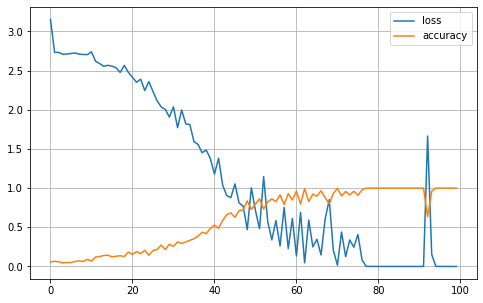

KeyError: ignored

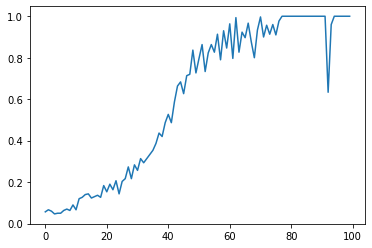

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,batch_size=16,verbose=1)
model_json = model.to_json()
with open('drive/MyDrive/Cuoiky_AI/Model/face_compare_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Cuoiky_AI/Model/face_compare_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()